# Analysis of Movie/TV Show dataset

In [607]:
# import python libraries to be used
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [608]:
#importing the dataset
cap = pd.read_csv('capstonedata.csv')

### We start by cleaning our data

In [609]:
# confirm the imported dataset
cap.head()

,show_id,Type,title,director,Country,date added,rating,duration,listed_in
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,9/25/2021,PG-13,90 min,Documentaries
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,(9/24/2021),TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,(9/24/2021),TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,9/22/2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sANKOFa,Haile Gerima,Us,9/24/2021,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### Rename the columns

In [610]:
cap.columns

Index(['show_id', 'Type', 'title', 'director', 'Country', 'date added',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [611]:
cap.columns = cap.columns.str.lower().str.replace(' ', '_')  # convert column names to lower case and replace space with _

In [612]:
cap.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [613]:
cap.dtypes   #Get the data types for the columns

show_id       object
type          object
title         object
director      object
country       object
date_added    object
rating        object
duration      object
listed_in     object
dtype: object

#### Remove the characters in the date_added column

In [614]:
cap = cap.replace('(9/24/2021)', '9/24/2021')   #remove the bracket

In [615]:
cap.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,9/25/2021,PG-13,90 min,Documentaries
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,9/24/2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,9/24/2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,9/22/2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sANKOFa,Haile Gerima,Us,9/24/2021,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


#### Change the date_added column to datetype

In [616]:
cap["date_added"] = pd.to_datetime(cap["date_added"])  #change the date_added column to datetype

In [617]:
cap.dtypes

show_id               object
type                  object
title                 object
director              object
country               object
date_added    datetime64[ns]
rating                object
duration              object
listed_in             object
dtype: object

### Convert the items in the title column to lowercase

In [618]:
cap.title.str.lower()  #convert the items in the title column to lowercase

0                   dick johnson is dead
1                              ganglands
2                          midnight mass
3       confessions of an invisible girl
4                                sankofa
                      ...               
8785                          yunus emre
8786                           zak storm
8787                  zindagi gulzar hai
8788                                yoko
8789                                 yom
Name: title, Length: 8790, dtype: object

In [619]:
cap.title = cap.title.str.lower()

In [620]:
cap.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in
0,s1,Movie,dick johnson is dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries
1,s3,TV Show,ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,midnight mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,confessions of an invisible girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sankofa,Haile Gerima,Us,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [621]:
cap.director

0       Kirsten Johnson
1       Julien Leclercq
2         Mike Flanagan
3         Bruno Garotti
4          Haile Gerima
             ...       
8785          Not Given
8786          Not Given
8787          Not Given
8788          Not Given
8789          Not Given
Name: director, Length: 8790, dtype: object

### The most popular director

In [622]:
from collections import Counter as c

In [623]:
c(cap['director'])   # To find the most popular director

Counter({'Not Given': 2588,
         'Rajiv Chilaka': 20,
         'Raúl Campos, Jan Suter': 18,
         'Alastair Fothergill': 18,
         'Suhas Kadav': 16,
         'Marcus Raboy': 16,
         'Jay Karas': 14,
         'Cathy Garcia-Molina': 13,
         'Youssef Chahine': 12,
         'Martin Scorsese': 12,
         'Jay Chapman': 12,
         'Steven Spielberg': 11,
         'Mark Thornton, Todd Kauffman': 10,
         'Don Michael Paul': 10,
         'David Dhawan': 9,
         'Quentin Tarantino': 8,
         'Robert Rodriguez': 8,
         'Yılmaz Erdoğan': 8,
         'Hakan Algül': 8,
         'Fernando Ayllón': 8,
         'Troy Miller': 8,
         'Kunle Afolayan': 8,
         'Ryan Polito': 8,
         'Shannon Hartman': 8,
         'Lance Bangs': 8,
         'Johnnie To': 8,
         'Toshiya Shinohara': 7,
         'Prakash Satam': 7,
         'Clint Eastwood': 7,
         'Ram Gopal Varma': 7,
         'McG': 7,
         'Hidenori Inoue': 7,
         'Mae Czarina Cr

In [624]:
c(cap['director']).most_common(6)[1:7]  #slice the top five directors

[('Rajiv Chilaka', 20),
 ('Raúl Campos, Jan Suter', 18),
 ('Alastair Fothergill', 18),
 ('Suhas Kadav', 16),
 ('Marcus Raboy', 16)]

In [625]:
director = c(cap['director']).most_common(5)[1:5]

In [626]:
pd.DataFrame(director)

,0,1
0,Rajiv Chilaka,20
1,"Raúl Campos, Jan Suter",18
2,Alastair Fothergill,18
3,Suhas Kadav,16


In [627]:
pop_dir = pd.DataFrame(director)
pop_dir.columns = ['director', 'count']
pop_dir

,director,count
0,Rajiv Chilaka,20
1,"Raúl Campos, Jan Suter",18
2,Alastair Fothergill,18
3,Suhas Kadav,16


Text(0.5, 1.0, 'Most popular director')

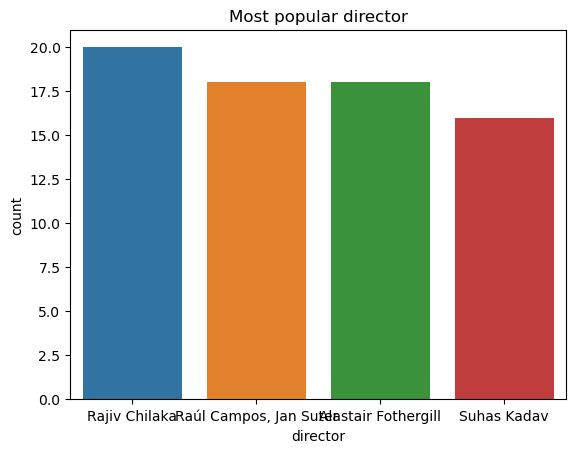

In [709]:
sns.barplot(data=pop_dir, x='director', y='count')
plt.title('Most popular director')

In [628]:
cap.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in
0,s1,Movie,dick johnson is dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries
1,s3,TV Show,ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,midnight mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,confessions of an invisible girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sankofa,Haile Gerima,Us,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [629]:
cap.iloc[:,1]  #slicing the type column

0         Movie
1       TV Show
2       TV Show
3         Movie
4         Movie
         ...   
8785    TV Show
8786    TV Show
8787    TV Show
8788    TV Show
8789    TV Show
Name: type, Length: 8790, dtype: object

In [630]:
cap.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in
0,s1,Movie,dick johnson is dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries
1,s3,TV Show,ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,midnight mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,confessions of an invisible girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sankofa,Haile Gerima,Us,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### Replace the abbreviations in type column

In [631]:
type_replace = {'Mvie$':'Movie',
                'Mve$':'Movie',
                'Mv$':'Movie', 
                'Mvi$':'Movie',
                'MvE$':'Movie',
                'M$':'Movie',
                'm$':'Movie',
                'TV$':'TV Show',
                'TVS$':'TV Show',
                'tv$':'TV Show'}

In [632]:
cap.type.replace(type_replace, regex=True)

0         Movie
1       TV Show
2       TV Show
3         Movie
4         Movie
         ...   
8785    TV Show
8786    TV Show
8787    TV Show
8788    TV Show
8789    TV Show
Name: type, Length: 8790, dtype: object

In [633]:
cap.type = cap.type.replace(type_replace, regex=True)

In [634]:
cap.type.replace(type_replace).value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [635]:
cap.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in
0,s1,Movie,dick johnson is dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries
1,s3,TV Show,ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,midnight mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,confessions of an invisible girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sankofa,Haile Gerima,Us,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [637]:
for i in cap.columns:
  if cap[i].dtypes == 'object':
    print(cap[i].value_counts(), '\n\n')

show_id
s1       1
s7990    1
s7982    1
s7984    1
s7986    1
        ..
s3960    1
s3958    1
s3956    1
s3955    1
s8786    1
Name: count, Length: 8790, dtype: int64 


type
Movie      6126
TV Show    2664
Name: count, dtype: int64 


title
esperando la carroza        2
09-feb                      2
fullmetal alchemist         2
15-aug                      2
sin senos sí hay paraíso    2
                           ..
mercy black                 1
the trap                    1
pinky memsaab               1
love o2o                    1
yom                         1
Name: count, Length: 8782, dtype: int64 


director
Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Liv

In [636]:
cap.country.value_counts()

country
United States     2920
India             1047
United Kingdom     604
Pakistan           419
Not Given          287
                  ... 
Greece               1
Soviet Union         1
ITL                  1
PK                   1
Paraguay             1
Name: count, Length: 114, dtype: int64

### Change the country abbreviations to full names

In [638]:
# cleaning the country column
country_replace = {'Us$':'United States',
                'uk$':'United Kingdom',
                'US$':'United States', 
                'ITL$':'Italy',
                'ID$':'Indonesia',
                'HK$':'Hong Kong',
                'united states$':'United States',
                'Unted State$':'United States',
                'thailan$':'Thailand',
                'australia$':'Australia',
                'canada$':'Canada',
                'Argentin$':'Argentina',
                 'thailand$':'Thailand'
                  }

In [639]:
cap.country.replace(country_replace, regex=True)

0       United States
1              France
2       United States
3              Brazil
4       United States
            ...      
8785           Turkey
8786    United States
8787         Pakistan
8788         Pakistan
8789         Pakistan
Name: country, Length: 8790, dtype: object

In [640]:
cap.country = cap.country.replace(country_replace, regex=True)

In [641]:
cap.country.replace(country_replace).value_counts()

country
United States     3060
India             1047
United Kingdom     620
Pakistan           419
Not Given          287
                  ... 
West Germany         1
Greece               1
Soviet Union         1
Mozambique           1
Zimbabwe             1
Name: count, Length: 102, dtype: int64

###	Extract the year, month and day from the date column and creat new columns for them

In [642]:
cap['date_added'].dt.day  #extract the days from date_added column

0       25
1       24
2       24
3       22
4       24
        ..
8785    17
8786    13
8787    15
8788    23
8789     7
Name: date_added, Length: 8790, dtype: int32

In [643]:
cap['day_added'] = cap['date_added'].dt.day #create day_added column

In [644]:
cap.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in,day_added
0,s1,Movie,dick johnson is dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,25
1,s3,TV Show,ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",24
2,s6,TV Show,midnight mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",24
3,s14,Movie,confessions of an invisible girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",22
4,s8,Movie,sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",24


In [645]:
cap['date_added'].dt.month      #extract the months from date_added column

0        9
1        9
2        9
3        9
4        9
        ..
8785     1
8786     9
8787    12
8788     6
8789     6
Name: date_added, Length: 8790, dtype: int32

In [646]:
cap['month_added'] = cap['date_added'].dt.month    #create month_added column

In [647]:
cap.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in,day_added,month_added
0,s1,Movie,dick johnson is dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,25,9
1,s3,TV Show,ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",24,9
2,s6,TV Show,midnight mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",24,9
3,s14,Movie,confessions of an invisible girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",22,9
4,s8,Movie,sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",24,9


In [648]:
 cap['date_added'].dt.year    #extract the years from the date_added column

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8785    2017
8786    2018
8787    2016
8788    2018
8789    2018
Name: date_added, Length: 8790, dtype: int32

In [649]:
cap['year_added'] = cap['date_added'].dt.year    #create year_added column

In [650]:
cap.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in,day_added,month_added,year_added
0,s1,Movie,dick johnson is dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,25,9,2021
1,s3,TV Show,ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",24,9,2021
2,s6,TV Show,midnight mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",24,9,2021
3,s14,Movie,confessions of an invisible girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",22,9,2021
4,s8,Movie,sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",24,9,2021


### Movie trends over the years

In [651]:
cap.groupby('year_added')['type']   

In [652]:
x = cap.groupby('year_added')['type']

In [653]:
cap.groupby('year_added')['type'].count()

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: type, dtype: int64

In [654]:
  trend = cap.groupby('year_added')['type'].count()   # use DataFrame for output
df = pd.DataFrame(trend)
df

,type
year_added,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,11
2014,24
2015,82
2016,426


In [714]:
# create a dictionary for movie trends to enable visualization
movie_trends = {
    2008: 2,
    2009: 2,
    2010: 1,
    2011: 13,
    2012: 3,
    2013: 11,
    2014: 24,
    2015: 82,
    2016: 426,
    2017: 1185,
    2018: 1648,
    2019: 2016,
    2020: 1879,
    2021: 1498
}

In [717]:
years = list(movie_trends.keys())
movie_counts = list(movie_trends.values())

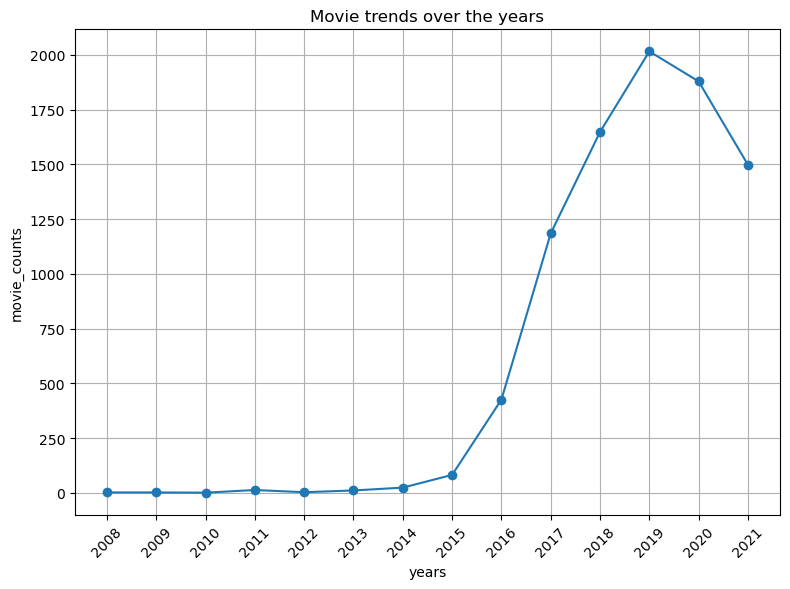

In [722]:
plt.figure(figsize=(8, 6))
plt.plot(years, movie_counts, marker='o', linestyle='-')
plt.title('Movie trends over the years')
plt.xlabel('years')
plt.ylabel('movie_counts')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

In [253]:
cap.country.value_counts()

country
United States     3060
India             1047
United Kingdom     620
Pakistan           419
Not Given          287
                  ... 
West Germany         1
Greece               1
Soviet Union         1
Mozambique           1
Zimbabwe             1
Name: count, Length: 102, dtype: int64

### The countries that make the most and least movies 

In [655]:
country = cap.country.value_counts()     # extracting the top and least countries
pd.DataFrame(country)
countries = pd.DataFrame(country)
countries.head(5)

,count
country,
United States,3060
India,1047
United Kingdom,620
Pakistan,419
Not Given,287


In [656]:
countries.tail(5)

,count
country,
West Germany,1
Greece,1
Soviet Union,1
Mozambique,1
Zimbabwe,1


In [657]:
top_countries = countries.head(5)
top_countries

,count
country,
United States,3060
India,1047
United Kingdom,620
Pakistan,419
Not Given,287


<Figure size 1500x800 with 0 Axes>

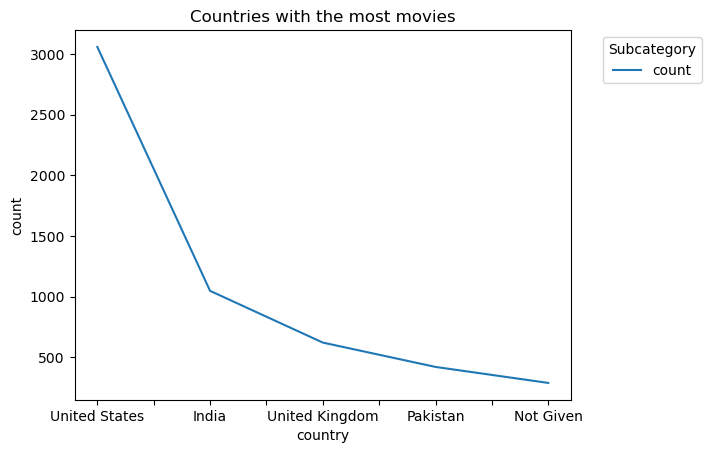

In [738]:
plt.figure(figsize = (15, 8))
top_countries.plot()
plt.title("Countries with the most movies")
plt.xlabel("country")
plt.ylabel("count")
plt.legend(title = "Subcategory", bbox_to_anchor = (1.05, 1), loc = "upper left");

In [658]:
least_countries = countries.tail(5)
least_countries

,count
country,
West Germany,1
Greece,1
Soviet Union,1
Mozambique,1
Zimbabwe,1


<Figure size 1500x800 with 0 Axes>

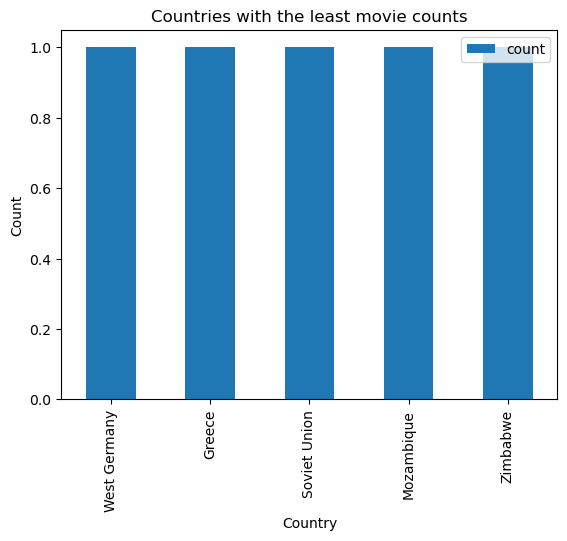

In [742]:
plt.figure(figsize = (15, 8))
least_countries.plot(kind = "bar")
plt.title("Countries with the least movie counts")
plt.xlabel("Country")
plt.ylabel("Count");

In [427]:
cap.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in,day_added,month_added,year_added
0,s1,Movie,dick johnson is dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,25,9,2021
1,s3,TV Show,ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",24,9,2021
2,s6,TV Show,midnight mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",24,9,2021
3,s14,Movie,confessions of an invisible girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",22,9,2021
4,s8,Movie,sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",24,9,2021


###	Write a function that takes the TV series duration and puts them into another column 

In [659]:
def season(row):
    if 'Season' in row['duration']:
        result = row['duration'].split(' ')[0]
        return result    

In [660]:
cap.apply(season, axis=1)

0       None
1          1
2          1
3       None
4       None
        ... 
8785       2
8786       3
8787       1
8788       1
8789       1
Length: 8790, dtype: object

In [661]:
cap['TV_series_duration'] = cap.apply(season, axis=1)   #Create a TV series duration column

In [662]:
cap.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in,day_added,month_added,year_added,TV_series_duration
0,s1,Movie,dick johnson is dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,25,9,2021,None
1,s3,TV Show,ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",24,9,2021,1
2,s6,TV Show,midnight mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",24,9,2021,1
3,s14,Movie,confessions of an invisible girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",22,9,2021,None
4,s8,Movie,sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",24,9,2021,None


In [663]:
def min(row):
    if 'min' in row['duration']:
        result = row['duration'].split(' ')[0]
        return result 

In [664]:
cap.apply(min, axis=1)

0         90
1       None
2       None
3         91
4        125
        ... 
8785    None
8786    None
8787    None
8788    None
8789    None
Length: 8790, dtype: object

In [665]:
cap['movie_duration'] = cap.apply(min, axis=1)   #create a column for movie duration

In [666]:
cap.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in,day_added,month_added,year_added,TV_series_duration,movie_duration
0,s1,Movie,dick johnson is dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,25,9,2021,None,90
1,s3,TV Show,ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",24,9,2021,1,None
2,s6,TV Show,midnight mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",24,9,2021,1,None
3,s14,Movie,confessions of an invisible girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",22,9,2021,None,91
4,s8,Movie,sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",24,9,2021,None,125


### Convert the new columns to float data type

In [667]:
cap.dtypes

show_id                       object
type                          object
title                         object
director                      object
country                       object
date_added            datetime64[ns]
rating                        object
duration                      object
listed_in                     object
day_added                      int32
month_added                    int32
year_added                     int32
TV_series_duration            object
movie_duration                object
dtype: object

In [674]:
cap.movie_duration.astype('float')
cap.movie_duration = cap.movie_duration.astype('float')

In [675]:
cap.TV_series_duration.astype('float')
cap.TV_series_duration = cap.TV_series_duration.astype('float')

In [676]:
cap.dtypes

show_id                       object
type                          object
title                         object
director                      object
country                       object
date_added            datetime64[ns]
rating                        object
duration                      object
listed_in                     object
day_added                      int32
month_added                    int32
year_added                     int32
TV_series_duration           float64
movie_duration               float64
dtype: object

#### Average Movie duration

In [678]:
cap.movie_duration.mean()

99.61785421785422

#### Maximum movie duration

In [686]:
cap.movie_duration.max()

312.0

### Countries with highest average movie durations

In [679]:
cap.groupby('country')['movie_duration']

In [689]:
avg_durations = cap.groupby('country')['movie_duration'].mean()

In [691]:
highest_avg_durations = avg_durations.nlargest(5)
highest_avg_durations

country
Croatia         157.0
West Germany    150.0
Soviet Union    147.0
Cameroon        143.0
PK              131.0
Name: movie_duration, dtype: float64

In [692]:
pd.DataFrame(highest_avg_durations)

,movie_duration
country,
Croatia,157.0
West Germany,150.0
Soviet Union,147.0
Cameroon,143.0
PK,131.0


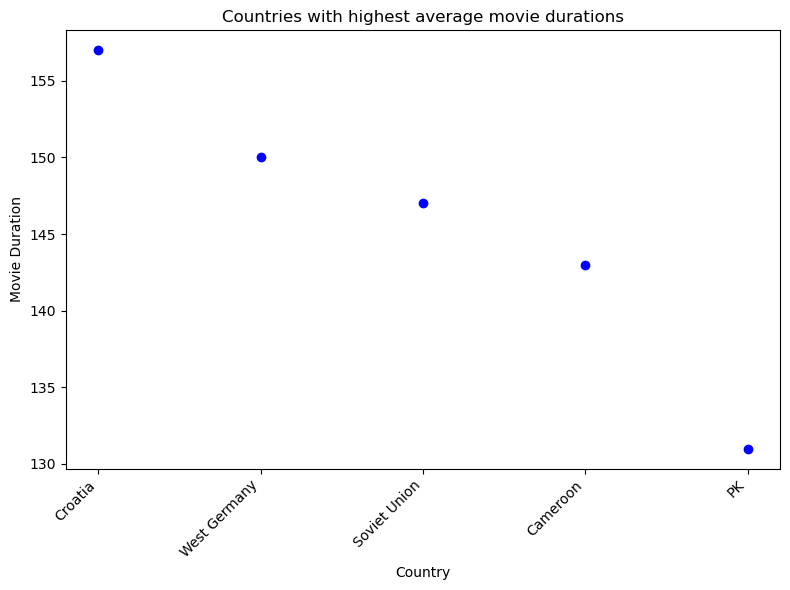

In [748]:
#create a dictionary for the countries movie durations

country_durations = {
    'Croatia': 157.0,
    'West Germany': 150.0,
    'Soviet Union': 147.0,
    'Cameroon': 143.0,
    'PK': 131.0
}

# Extract countries and durations from the dictionary
countries = list(country_durations.keys())
durations = list(country_durations.values())

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(countries, durations, color='blue')
plt.title('Countries with highest average movie durations')
plt.xlabel('Country')
plt.ylabel('Movie Duration')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.tight_layout()
plt.show()

### To find the most popular genre

In [298]:
cap['listed_in'].str.split(',',expand=True)   #Trying to split the listed_in column into various genres


,0,1,2
0,Documentaries,None,None
1,Crime TV Shows,International TV Shows,TV Action & Adventure
2,TV Dramas,TV Horror,TV Mysteries
3,Children & Family Movies,Comedies,None
4,Dramas,Independent Movies,International Movies
...,...,...,...
8785,International TV Shows,TV Dramas,None
8786,Kids' TV,None,None
8787,International TV Shows,Romantic TV Shows,TV Dramas
8788,Kids' TV,None,None


In [351]:
# Splitting the genres in the listed_in column

dt = cap.listed_in.str.split(',',expand=True)
df = pd.DataFrame(dt)
df
df.columns = ['first_genre','second_genre','third genre']    # Naming the new columns
df.columns
df

,first_genre,second_genre,third genre
0,Documentaries,None,None
1,Crime TV Shows,International TV Shows,TV Action & Adventure
2,TV Dramas,TV Horror,TV Mysteries
3,Children & Family Movies,Comedies,None
4,Dramas,Independent Movies,International Movies
...,...,...,...
8785,International TV Shows,TV Dramas,None
8786,Kids' TV,None,None
8787,International TV Shows,Romantic TV Shows,TV Dramas
8788,Kids' TV,None,None


In [347]:
g1 = cap['listed_in'].str.split(',',expand=True)[0].to_list()
g2 = cap['listed_in'].str.split(',',expand=True)[1].str.lstrip(' ').to_list()
g3 = cap['listed_in'].str.split(',',expand=True)[2].str.lstrip(' ').to_list()

In [339]:
# finding the most popular genre

data = cap.listed_in
df = pd.DataFrame(data)
genre = df['listed_in'].str.split(',').explode()
genre_counts = genre.value_counts()
most_popular = genre_counts.idxmax()

print('The most popular genre in listed_in column is:',most_popular)

The most popular genre in listed_in column is:  International Movies


### The Month with the highest movie count

In [547]:
cap['month_added'].value_counts()   # Month that has the highest movie rate

month_added
7     827
12    812
9     769
4     763
10    760
8     754
3     741
1     737
6     728
11    705
5     632
2     562
Name: count, dtype: int64

In [767]:
x = cap['month_added'].value_counts()
pd.DataFrame(x)
y = pd.DataFrame(x)
y

,count
month_added,
7,827
12,812
9,769
4,763
10,760
8,754
3,741
1,737
6,728


In [777]:
y.max()
print('The month with the highest movie count is', 'July')

The month with the highest movie count is July


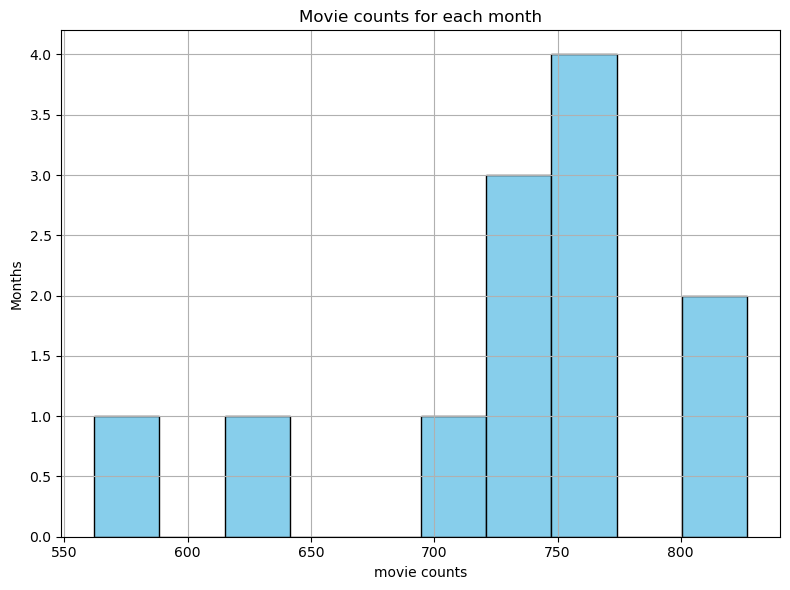

In [779]:
# visualize months with their count
data = {
    1: 737,
    2: 562,
    3: 741,
    4: 763,
    5: 632,
    6: 728,
    7: 827,
    8: 754,
    9: 769,
    10: 760,
    11: 705,
    12: 812
}

# Extract y-values from the dictionary
y_values = list(data.values())
x_values = list(data.keys())

# Plotting
plt.figure(figsize=(8, 6))
plt.hist(y_values, bins=10, color='skyblue', edgecolor='black')
plt.title('Movie counts for each month')
plt.xlabel('movie counts')
plt.ylabel('Months')
plt.grid(True)
plt.tight_layout()
plt.show()

###	Write a function that creates random ratings for each movie in 2s.f

In [695]:
import random

In [696]:
def new_rating(movies):
    ratings = [round(random.uniform(13, 19), 2) for _ in range(movies)]
    return ratings

In [703]:
movies = 6126
random_ratings = new_rating(movies)
    
random_ratings

[15.36,
 17.03,
 16.09,
 17.64,
 17.29,
 14.08,
 15.09,
 13.62,
 17.15,
 16.83,
 17.54,
 17.51,
 15.39,
 14.23,
 13.75,
 17.76,
 15.0,
 14.04,
 16.54,
 14.93,
 16.86,
 16.09,
 14.03,
 17.82,
 16.37,
 15.24,
 15.73,
 13.62,
 13.55,
 15.36,
 13.8,
 17.3,
 13.55,
 16.0,
 17.24,
 17.95,
 15.46,
 14.9,
 14.38,
 17.51,
 17.6,
 16.37,
 17.91,
 13.76,
 14.26,
 14.83,
 15.27,
 15.03,
 13.99,
 15.55,
 15.26,
 17.17,
 17.56,
 14.58,
 14.5,
 14.58,
 13.87,
 16.3,
 15.96,
 15.61,
 15.65,
 13.59,
 17.44,
 17.99,
 15.35,
 17.7,
 14.18,
 16.1,
 13.45,
 14.67,
 16.41,
 16.26,
 14.18,
 17.97,
 13.21,
 14.87,
 13.27,
 17.65,
 16.02,
 16.63,
 14.37,
 17.41,
 17.93,
 17.6,
 16.56,
 16.68,
 15.61,
 17.38,
 17.42,
 14.4,
 13.14,
 17.72,
 13.19,
 15.07,
 14.94,
 17.75,
 17.83,
 17.95,
 14.54,
 13.03,
 15.0,
 16.25,
 17.47,
 15.69,
 13.59,
 16.36,
 16.16,
 14.64,
 15.56,
 14.01,
 16.52,
 15.78,
 16.62,
 16.5,
 15.0,
 14.61,
 17.06,
 13.6,
 13.68,
 17.16,
 17.28,
 15.42,
 16.78,
 13.89,
 14.46,
 15.32,
 13.43,


In [701]:
pd.DataFrame(random_ratings)

,0
0,14.64
1,17.46
2,16.40
3,16.75
4,17.44
...,...
6121,15.73
6122,15.75
6123,17.84
6124,14.72
